In [1]:
import os
import glob
import numpy as np
import pandas as pd
import dask.dataframe as dd
from scipy.stats import chi2
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_some_data_from_data_frame(filename, cols_to_keep, col_data_types):
    """
    Function to filter specific data from a bigger data frame.
    
    
    """
    df = pd.read_csv(filename, 
                     header=0, 
                     dtype={'kmer': 'O',
                         cols_to_keep: col_data_types,
                            'Name': 'O'},
                    usecols=['kmer',
                             cols_to_keep,
                             'Name'])
    name = df['Name'].unique()[0]
    df = df[['kmer', cols_to_keep]].reset_index(drop=True)
    return df.rename(columns={cols_to_keep: name})

In [ ]:
get_some_data_from_data_frame('Results/Scores/Methyloligella/Methyloligella_kmer_9_Chr_scores.csv',
                              'Frequency', 
                              "float64"
                             )

In [15]:
k = 6
type_seq = 'Plsm'
filenames = glob.glob(f'Results/Scores/*/*_{k}_{type_seq}_scores.csv')
filenames[:5]

['Results/Scores/Xenorhabdus/Xenorhabdus_kmer_6_Plsm_scores.csv',
 'Results/Scores/Undibacterium/Undibacterium_kmer_6_Plsm_scores.csv',
 'Results/Scores/Mannheimia/Mannheimia_kmer_6_Plsm_scores.csv',
 'Results/Scores/Rhodobacter/Rhodobacter_kmer_6_Plsm_scores.csv',
 'Results/Scores/Paenarthrobacter/Paenarthrobacter_kmer_6_Plsm_scores.csv']

In [16]:
# filename = 'Results/Scores/Methyloligella/Methyloligella_kmer_4_Chr_scores.csv'
to_keep = 'Frequency'
data_type = "float64"

In [17]:
df_list = [get_some_data_from_data_frame(filename, 
                                         to_keep, 
                                         data_type).set_index('kmer', 
                                                              drop=True) for filename in filenames]

In [18]:
df = pd.concat(df_list, axis=1) # join='inner'
dd = df.reset_index(drop=True)

In [ ]:
file_name = f'freq_kmer_{k}_{type_seq}'
full_path = os.path.join('Results', 'Matrices_distances')
path = f'{full_path}/{file_name}.csv'
if not os.path.exists(full_path):
    os.makedirs(full_path)
dd.to_csv(f'{path}', index=False)

In [19]:
dd

,Xenorhabdus,Undibacterium,Mannheimia,Rhodobacter,Paenarthrobacter,Thiomicrorhabdus,Desulfocapsa,Rhodococcus,Methylovorus,Brochothrix,...,Thalassospira,Providencia,Pseudobutyrivibrio,Xanthobacter,Gallibacterium,Nissabacter,Massilia,Verrucosispora,Nostoc,Zymobacter
0,0.001085,0.000583,0.002618,0.000036,0.000056,0.002014,0.001660,0.000023,0.000717,0.005680,...,0.000484,0.001073,0.001189,0.000070,0.003971,0.000581,0.000209,0.000000,0.001060,0.002967
1,0.000836,0.000460,0.001418,0.000048,0.000104,0.001250,0.000844,0.000049,0.000335,0.001846,...,0.000679,0.000712,0.000898,0.000080,0.001324,0.000426,0.000164,0.000027,0.000744,0.001385
2,0.000691,0.000376,0.000982,0.000061,0.000119,0.001229,0.001225,0.000044,0.000543,0.002726,...,0.000442,0.000758,0.000655,0.000078,0.001765,0.000472,0.000164,0.000000,0.000750,0.000593
3,0.000997,0.000609,0.001418,0.000043,0.000066,0.001281,0.000898,0.000038,0.000590,0.003692,...,0.000561,0.000814,0.001431,0.000096,0.002647,0.000465,0.000201,0.000000,0.001206,0.001780
4,0.000659,0.000408,0.000545,0.000046,0.000109,0.001012,0.000789,0.000057,0.000312,0.001818,...,0.000506,0.000619,0.000752,0.000072,0.001324,0.000283,0.000147,0.000027,0.000577,0.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.000539,0.000356,0.000873,0.000036,0.000091,0.000702,0.000408,0.000049,0.000428,0.000880,...,0.000368,0.000435,0.000509,0.000067,0.000441,0.000245,0.000143,0.000000,0.000639,0.001187
4092,0.000812,0.000363,0.001309,0.000010,0.000035,0.001683,0.000844,0.000010,0.000497,0.001732,...,0.000282,0.000619,0.001359,0.000029,0.003089,0.000347,0.000115,0.000000,0.000908,0.002176
4093,0.000973,0.000492,0.001200,0.000076,0.000119,0.001105,0.000762,0.000078,0.000867,0.001306,...,0.000550,0.000601,0.001177,0.000137,0.001177,0.000453,0.000266,0.000027,0.000828,0.000989
4094,0.000724,0.000563,0.001418,0.000046,0.000109,0.001229,0.000898,0.000051,0.000740,0.001335,...,0.000650,0.000629,0.000558,0.000112,0.001177,0.000471,0.000172,0.000000,0.000963,0.002176


In [ ]:
# # df_freq = pd.concat(df_list, axis=1).reset_index(drop=True) # join='inner'
# for file in filenames:
#     name = file.split('/')[2]
#     df_freq = get_some_data_from_data_frame(file, 
#                                          to_keep, 
#                                          data_type).set_index('kmer', 
#                                                               drop=True)
# file_name = f'freq_kmer_{k}_{type_seq}'
# full_path = os.path.join('Results', 'Matrices_distances')
# path = f'{full_path}/{file_name}.csv'
# if not os.path.exists(full_path):
#     os.makedirs(full_path)
# df_freq.to_csv(f'{path}', index=False)

In [7]:
def get_pairwise_distance(df, metric='euclidean'):
    """
    Calculates the pairwise distance in a data frame.
    
    Inputs:
        df - data frame object
        metric - a string representing the metric to be used or function, optional.
        The distance function can be ‘braycurtis’,     ‘canberra’, ‘chebyshev’, ‘cityblock’, 
        ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, 
        ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’,
        ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.
        
    Outputs:
        dist_df - a data frame representing a matrix of pairwise distance from data in the
                  original data frame.
    """
    data = df.T
    dist_df = pd.DataFrame(
        squareform(pdist(data, 
                         metric=metric
                        )
                  ),
        columns = df.columns, 
        index=df.columns)
    return dist_df

In [30]:
def heat_map(df):
    fig, ax = plt.subplots(figsize=(11, 9))    
    sns.heatmap(
    df,
    cmap='OrRd',
    linewidth=1
    )

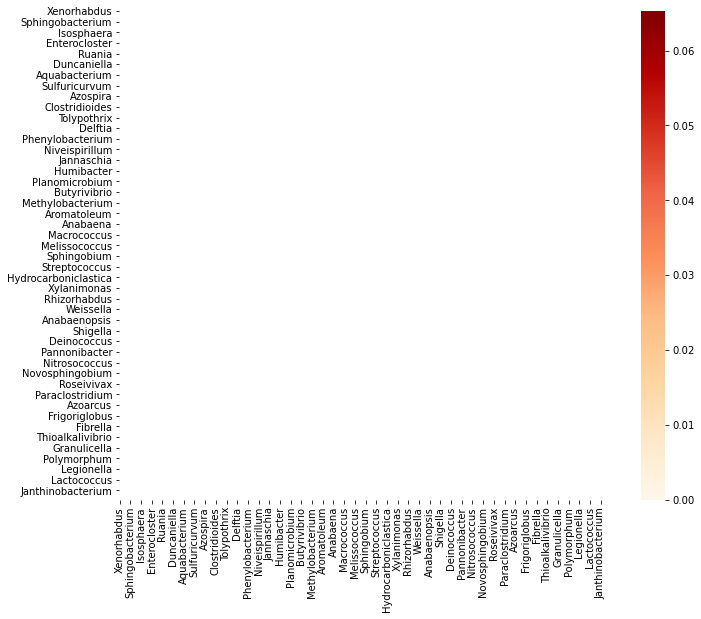

In [31]:
heat_map(dd_dis_eu)

In [20]:
dd_dis_eu = get_pairwise_distance(df, metric='euclidean')

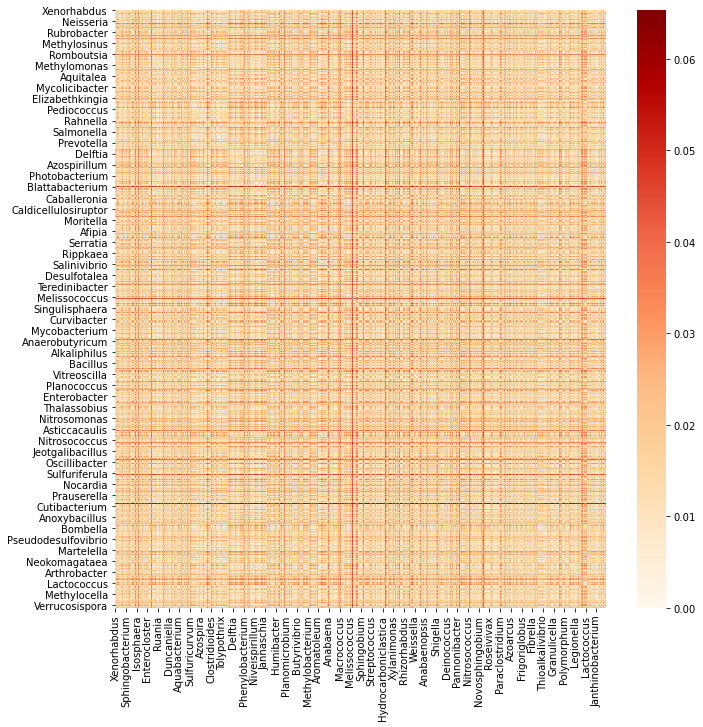

In [33]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(dd_dis_eu, cmap='OrRd')
plt.show()

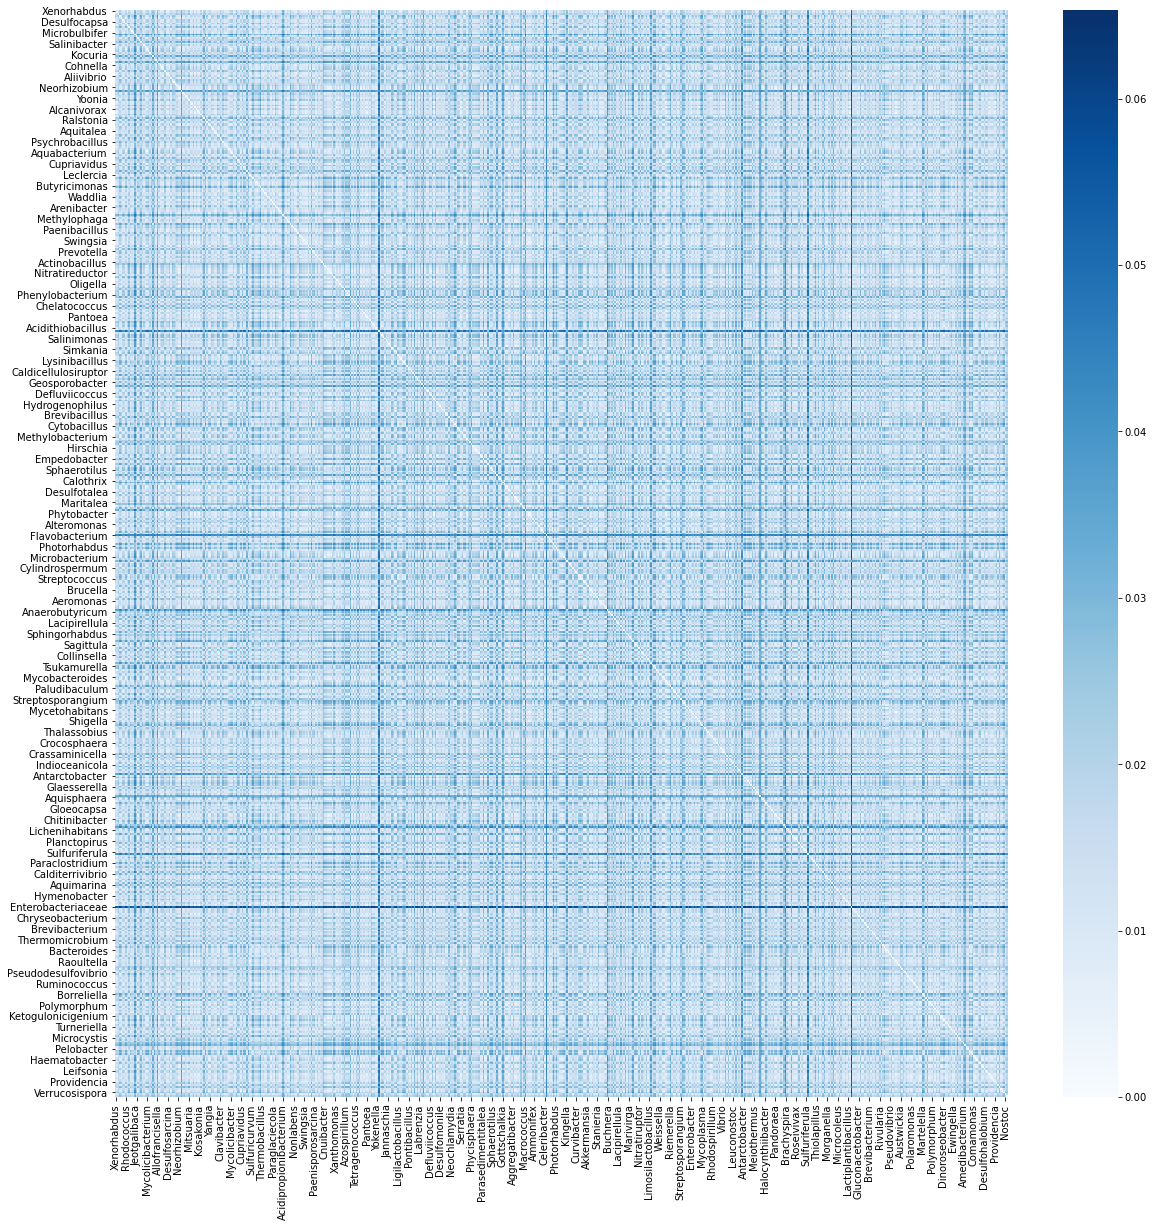

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dd_dis_eu, cmap="Blues")
plt.show()

In [ ]:

pd.DataFrame(
    squareform(pdist(df.T, metric='euclidean')), columns = df.columns, index=df.columns)

In [ ]:
dis = get_pairwise_distance(df, metric='euclidean')

In [ ]:
heat_map(dis)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(
    dis,
    cmap='OrRd',
    linewidth=1
)

In [ ]:
cos = get_pairwise_distance(df, metric='cosine')

# plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    cos,
    cmap='OrRd',
    linewidth=1
)

In [ ]:
heat_map(cos)

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(
#     dis.apply(lambda x : x / x.sum(), axis=1),
#     cmap='BuPu',
#     square=True,
#     cbar_kws = {'fraction' : 0.02}
# )

In [ ]:
# code to get the matrix of  frequencies

In [ ]:
def make_data_frame_from_data_frames(filenames, to_keep, data_type):
    # get the individual data frame from the generator
    df_gen = (
        get_some_data_from_data_frame(filename, to_keep, data_type).set_index('kmer', drop=True) 
        for filename in filenames
    )
    # join='inner'
    df = pd.concat(df_gen, axis=1)
    df.reset_index(drop=True)
    return df

In [ ]:
for file in files:
    n = file.split('/')[2]
    df = get_frequency_data_from_csv(file, 
                                     ['kmer', 'Frequency'], 
                                     {'kmer': 'O', 'Frequency': 'int64'}, 
                                     header=0)
    file_name = f'{n}_kmer_{k}_{seq_type}_freqs'
    full_path = os.path.join('Results', 'Matrices_distances', n)
    path = f'{full_path}/{file_name}.csv'
    if not os.path.exists(full_path):
        os.makedirs(full_path)
    df.to_csv(f'{path}', index=False)

In [ ]:
d = make_data_frame_from_data_frames(filenames[:5], to_keep, data_type).reset_index(drop=True)

In [ ]:
d

In [ ]:
d.iloc[0]

In [ ]:
names = os.listdir('Results/Scores')
names[:5]

In [ ]:
files[0]

In [ ]:
name = files[0].split('/')[2]

In [ ]:
def get_frequency_data_from_csv(filename, 
                                cols_keep, 
                                data_types, 
                                header=0, is_compressed=False):
    name = filename.split('/')[2]
    if is_compressed:
        df = pd.read_csv(filename, 
                     header=header, 
                     usecols=cols_keep,
                     dtype=data_types, compression='gzip')
    else:
        df = pd.read_csv(filename, 
                     header=header, 
                     usecols=cols_keep,
                     dtype=data_types)        
    df['Frequency'] = df['Observed'] / df['Observed'].sum()
    return df[['kmer', 'Observed', 'Frequency']]

In [ ]:
k = 4
seq_type = 'Plsm'
files = glob.glob(f'Results/Kmer_stats/*/Plasmids/kmers_{k}/*.csv.gz')

In [ ]:
files[:4]

In [ ]:
for file in files:
    n = file.split('/')[2]
    df = get_frequency_data_from_csv(file, 
                                     ['kmer', 'Observed'], 
                                     {'kmer': 'O', 'Observed': 'int64'}, 
                                     header=0)
    file_name = f'{n}_kmer_{k}_{seq_type}_freqs'
    full_path = os.path.join('Results', 'Frequency', n)
    path = f'{full_path}/{file_name}.csv'
    if not os.path.exists(full_path):
        os.makedirs(full_path)
    df.to_csv(f'{path}', index=False)